<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practice Loading and Describing Data 

_Authors: Matt Brems (DC)_

---

In this lab you will practice loading data using python and describing it with statistics.

It might be a good idea to first check the [source of the Boston housing data](https://archive.ics.uci.edu/ml/datasets/Housing).

### 1. Load the Boston housing data (provided)

In [1]:
# Download the data and save to a file called "housing.data."

import urllib
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# this saves a file called 'housing.data' locally'
urllib.urlretrieve(data_url, './datasets/housing.data')

('./datasets/housing.data',
 <httplib.HTTPMessage instance at 0x0000000006529FC8>)

The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for your convenience. You may choose to edit the names, should you decide it would be more helpful to do so.

In [2]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

### 2. Load the `housing.data` file with python

Using any method of your choice.

> _**Hint:** despite this file having a strange `.data` extension, using python's `open() as file` and `file.read()` or `file.readlines()` we can load this in and see that it is a text file formatted much the same as a CSV. You can use string operations to format the data._

In [3]:
housing_data_path = './datasets/housing.data'
rows = []
with open(housing_data_path, 'r') as f:
    reader = file.readlines(f)
    for row in reader:
        rows.append(row.replace('\n', '').split())
f.close()
print rows

[['0.00632', '18.00', '2.310', '0', '0.5380', '6.5750', '65.20', '4.0900', '1', '296.0', '15.30', '396.90', '4.98', '24.00'], ['0.02731', '0.00', '7.070', '0', '0.4690', '6.4210', '78.90', '4.9671', '2', '242.0', '17.80', '396.90', '9.14', '21.60'], ['0.02729', '0.00', '7.070', '0', '0.4690', '7.1850', '61.10', '4.9671', '2', '242.0', '17.80', '392.83', '4.03', '34.70'], ['0.03237', '0.00', '2.180', '0', '0.4580', '6.9980', '45.80', '6.0622', '3', '222.0', '18.70', '394.63', '2.94', '33.40'], ['0.06905', '0.00', '2.180', '0', '0.4580', '7.1470', '54.20', '6.0622', '3', '222.0', '18.70', '396.90', '5.33', '36.20'], ['0.02985', '0.00', '2.180', '0', '0.4580', '6.4300', '58.70', '6.0622', '3', '222.0', '18.70', '394.12', '5.21', '28.70'], ['0.08829', '12.50', '7.870', '0', '0.5240', '6.0120', '66.60', '5.5605', '5', '311.0', '15.20', '395.60', '12.43', '22.90'], ['0.14455', '12.50', '7.870', '0', '0.5240', '6.1720', '96.10', '5.9505', '5', '311.0', '15.20', '396.90', '19.15', '27.10'], ['

In [5]:
#split_rows = [row.split() for row in rows]
#print split_rows
data_dict = {names[i]: [row[i] for row in rows] for i in range(len(names))}
data_dict

{'AGE': ['65.20',
  '78.90',
  '61.10',
  '45.80',
  '54.20',
  '58.70',
  '66.60',
  '96.10',
  '100.00',
  '85.90',
  '94.30',
  '82.90',
  '39.00',
  '61.80',
  '84.50',
  '56.50',
  '29.30',
  '81.70',
  '36.60',
  '69.50',
  '98.10',
  '89.20',
  '91.70',
  '100.00',
  '94.10',
  '85.70',
  '90.30',
  '88.80',
  '94.40',
  '87.30',
  '94.10',
  '100.00',
  '82.00',
  '95.00',
  '96.90',
  '68.20',
  '61.40',
  '41.50',
  '30.20',
  '21.80',
  '15.80',
  '2.90',
  '6.60',
  '6.50',
  '40.00',
  '33.80',
  '33.30',
  '85.50',
  '95.30',
  '62.00',
  '45.70',
  '63.00',
  '21.10',
  '21.40',
  '47.60',
  '21.90',
  '35.70',
  '40.50',
  '29.20',
  '47.20',
  '66.20',
  '93.40',
  '67.80',
  '43.40',
  '59.50',
  '17.80',
  '31.10',
  '21.40',
  '36.80',
  '33.00',
  '6.60',
  '17.50',
  '7.80',
  '6.20',
  '6.00',
  '45.00',
  '74.50',
  '45.80',
  '53.70',
  '36.60',
  '33.50',
  '70.40',
  '32.20',
  '46.70',
  '48.00',
  '56.10',
  '45.10',
  '56.80',
  '86.30',
  '63.10',
  '66.1

In [6]:
import numpy as np

### 3.  Conduct a brief integrity check of your data. 

This integrity check should include, but is not limited to, checking for missing values and making sure all values make logical sense. (E.g. is one variable a percentage, but there are observations above 100%?)

Summarize your findings in a few sentences, including what you checked and, if appropriate, any 
steps you took to rectify potential integrity issues.

In [7]:
info = {'CRIM': 'per capita crime rate by town', 
          'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft',
          'INDUS': 'proportion of non-retail business acres per town', 
          'CHAS': 'Charles River dummy variable (= 1 if tract bounds, river; 0 otherwise)', 
          'NOX': 'nitric oxides concentration (parts per 10 million)', 
          'RM': 'average number of rooms per dwelling', 
          'AGE': 'proportion of owner-occupied units built prior to 1940', 
          'DIS': 'weighted distances to five Boston employment centres', 
          'RAD': 'index of accessibility to radial highways',
          'TAX': 'full-value property-tax rate per $10,000',
          'PTRATIO': 'pupil-teacher ratio by town',
          'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
          'LSTAT': '% lower status of the populattion', 
          'MEDV': 'Median value of owner-occupied homes in $1000s'}
info[names[0]]

'per capita crime rate by town'

In [8]:
#float the dataset before checks
for i in range(len(names)):
    data_dict[names[i]] = [float(cell)for cell in data_dict[names[i]]]

for i in range(len(names)):
    print 'empty cells in', names[i], ':', data_dict[names[i]].count(' '), '; no. of data', len(data_dict[names[i]])

for i in range(len(names)):
    print names[i], info[names[i]], '\n', 'min val:', min(data_dict[names[i]]), 'max val:', max(data_dict[names[i]])

empty cells in CRIM : 0 ; no. of data 506
empty cells in ZN : 0 ; no. of data 506
empty cells in INDUS : 0 ; no. of data 506
empty cells in CHAS : 0 ; no. of data 506
empty cells in NOX : 0 ; no. of data 506
empty cells in RM : 0 ; no. of data 506
empty cells in AGE : 0 ; no. of data 506
empty cells in DIS : 0 ; no. of data 506
empty cells in RAD : 0 ; no. of data 506
empty cells in TAX : 0 ; no. of data 506
empty cells in PTRATIO : 0 ; no. of data 506
empty cells in B : 0 ; no. of data 506
empty cells in LSTAT : 0 ; no. of data 506
empty cells in MEDV : 0 ; no. of data 506
CRIM per capita crime rate by town 
min val: 0.00632 max val: 88.9762
ZN proportion of residential land zoned for lots over 25,000 sq.ft 
min val: 0.0 max val: 100.0
INDUS proportion of non-retail business acres per town 
min val: 0.46 max val: 27.74
CHAS Charles River dummy variable (= 1 if tract bounds, river; 0 otherwise) 
min val: 0.0 max val: 1.0
NOX nitric oxides concentration (parts per 10 million) 
min val: 

### 4. For what two attributes does it make the *least* sense to calculate mean and median? Why?

In [9]:
# A:CHAS Charles River as it is a dummy variable and 

### 5. Which two variables have the strongest linear association? 

Report both variables, the metric you chose as the basis for your comparison, and the value of that metric. *(Hint: Make sure you consider only variables for which it makes sense to find a linear association.)*

DIS      NOX       -0.769230
NOX      DIS       -0.769230
DIS      AGE       -0.747881
AGE      DIS       -0.747881
LSTAT    MEDV      -0.737663
MEDV     LSTAT     -0.737663
DIS      INDUS     -0.708027
INDUS    DIS       -0.708027
RM       LSTAT     -0.613808
LSTAT    RM        -0.613808
AGE      ZN        -0.569537
ZN       AGE       -0.569537
TAX      DIS       -0.534432
DIS      TAX       -0.534432
INDUS    ZN        -0.533828
ZN       INDUS     -0.533828
NOX      ZN        -0.516604
ZN       NOX       -0.516604
MEDV     PTRATIO   -0.507787
PTRATIO  MEDV      -0.507787
DIS      LSTAT     -0.496996
LSTAT    DIS       -0.496996
DIS      RAD       -0.494588
RAD      DIS       -0.494588
INDUS    MEDV      -0.483725
MEDV     INDUS     -0.483725
         TAX       -0.468536
TAX      MEDV      -0.468536
B        RAD       -0.444413
RAD      B         -0.444413
                      ...   
INDUS    AGE        0.644779
AGE      INDUS      0.644779
DIS      ZN         0.664408
ZN       DIS  

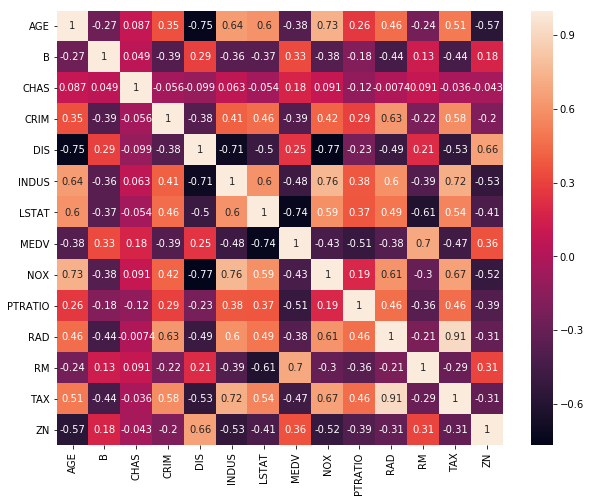

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
np.corrcoef(data_dict['INDUS'],data_dict['NOX'])

#plot heatmap
df = pd.DataFrame.from_dict(data_dict, orient='columns', dtype=None)
f, ax = plt.subplots(figsize= (10, 8))
sns.heatmap(df.corr(method='pearson'), annot=True)

#list correlation
corr = df.corr().unstack().sort_values()
corr 

### 6. Look at distributional qualities of variables.

Answer the following questions:
1. Which variable has the most symmetric distribution? 
2. Which variable has the most left-skewed (negatively skewed) distribution? 
3. Which variable has the most right-skewed (positively skewed) distribution? 

Defend your method for determining this.

In [39]:
import scipy.stats as stats
def summ_stat(col_name, data):
    print col_name
    print 'mean:', np.mean(data[col_name])
    print 'median:', np.median(data[col_name])
    print 'stdev:', np.std(data[col_name])
    print 'mean minus median:', np.mean(data[col_name]) - np.median(data[col_name])

def distribution_plotter(column, data_set):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)
    

CRIM
mean: 3.613523557312254
median: 0.25651
stdev: 8.59304135129577
mean minus median: 3.357013557312254
ZN
mean: 11.363636363636363
median: 0.0
stdev: 23.29939569476613
mean minus median: 11.363636363636363
INDUS
mean: 11.13677865612648
median: 9.69
stdev: 6.853570583390874
mean minus median: 1.4467786561264813
CHAS
mean: 0.0691699604743083
median: 0.0
stdev: 0.2537429349603471
mean minus median: 0.0691699604743083
NOX
mean: 0.5546950592885376
median: 0.538
stdev: 0.11576311540656137
mean minus median: 0.01669505928853754
RM
mean: 6.284634387351779
median: 6.2085
stdev: 0.7019225143345689
mean minus median: 0.0761343873517788
AGE
mean: 68.57490118577076
median: 77.5
stdev: 28.121032570236867
mean minus median: -8.925098814229244
DIS
mean: 3.795042687747036
median: 3.2074499999999997
stdev: 2.1036283563444593
mean minus median: 0.5875926877470361
RAD
mean: 9.549407114624506
median: 5.0
stdev: 8.698651117790636
mean minus median: 4.549407114624506
TAX
mean: 408.2371541501976
median: 33

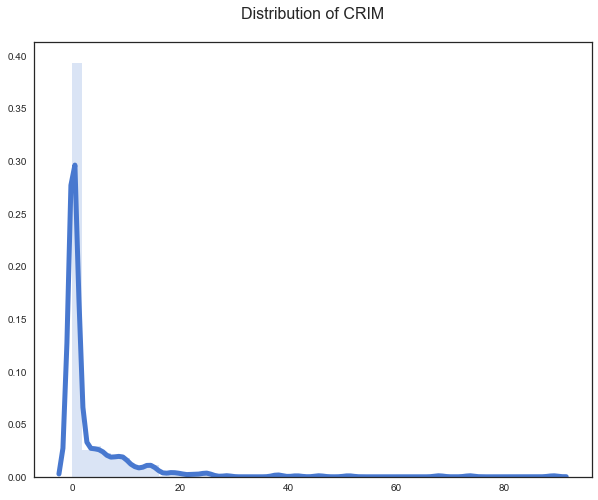

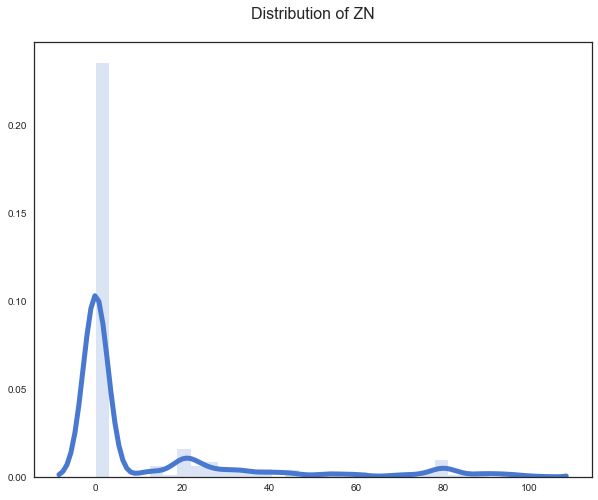

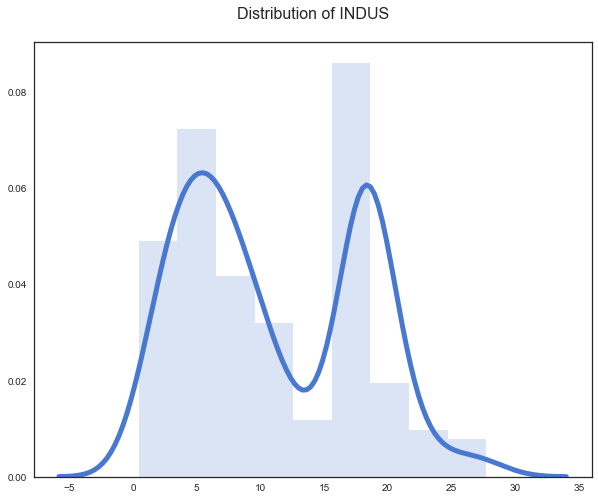

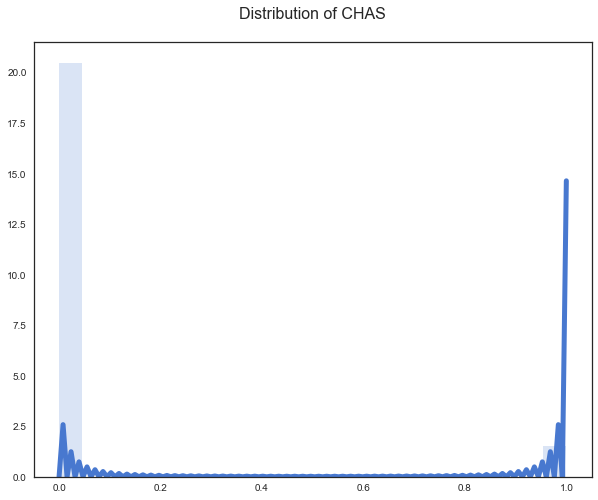

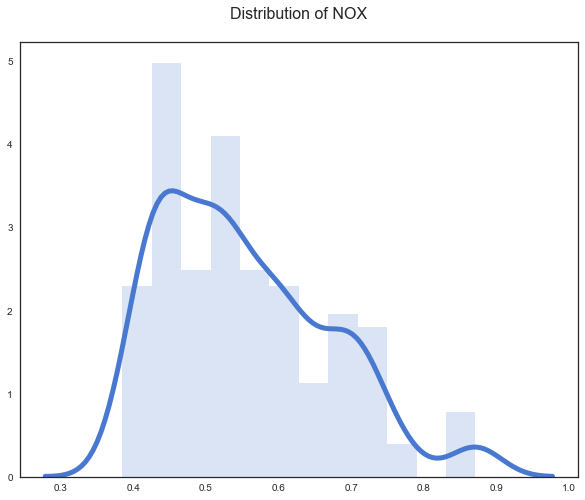

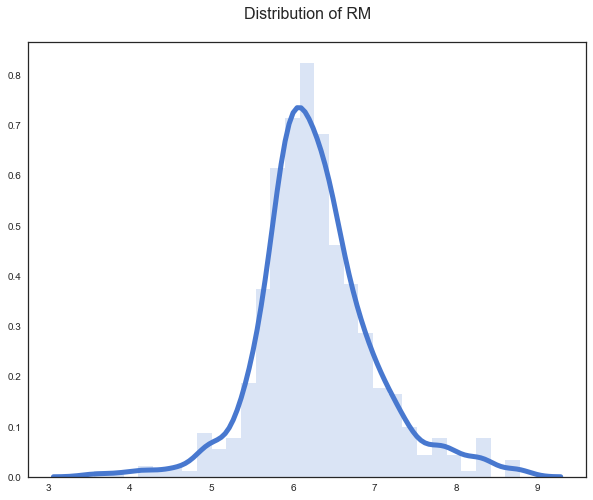

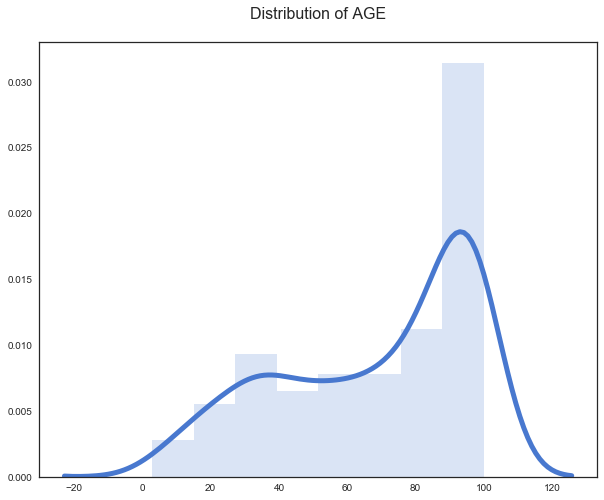

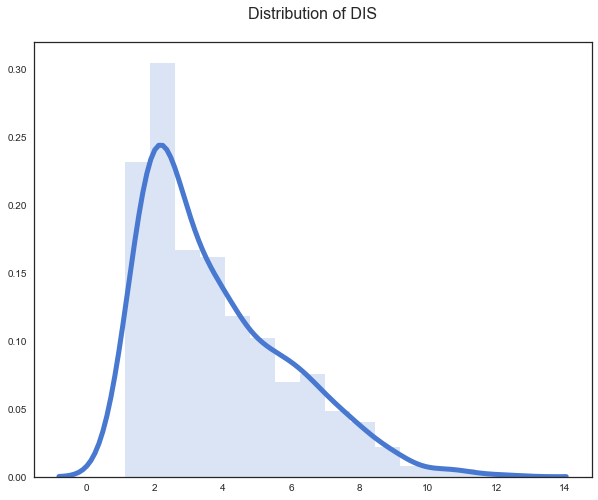

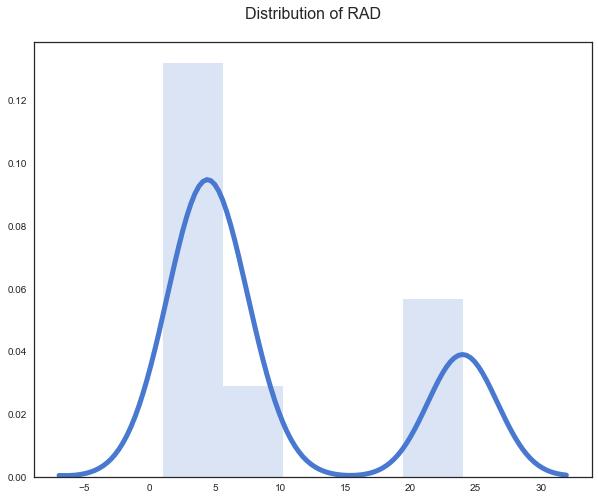

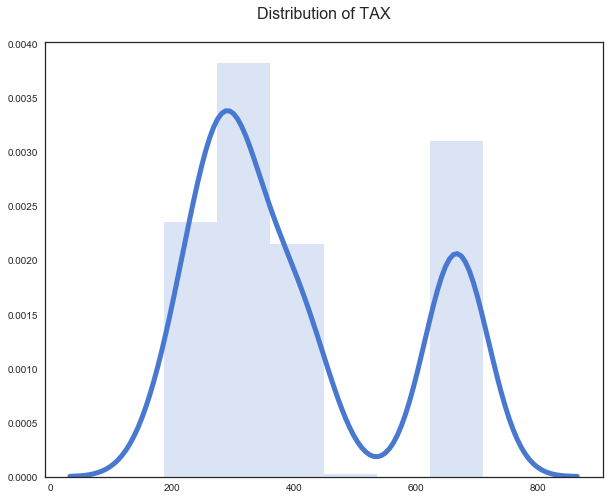

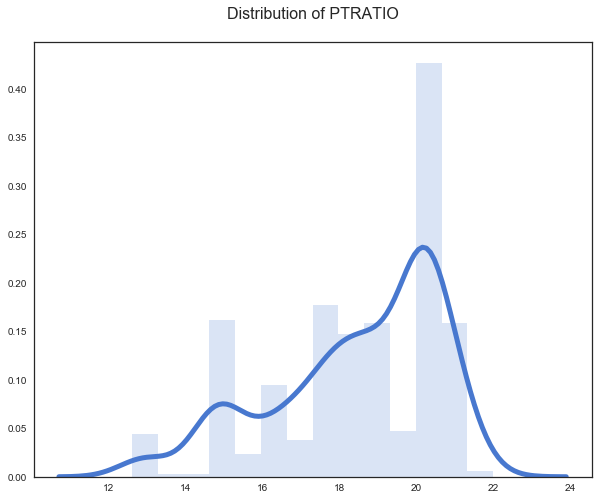

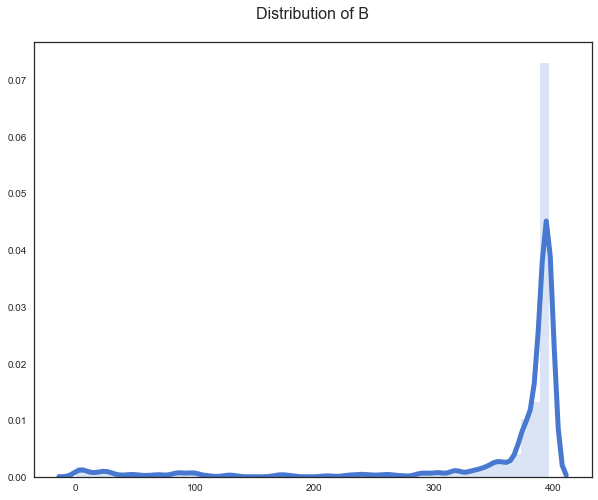

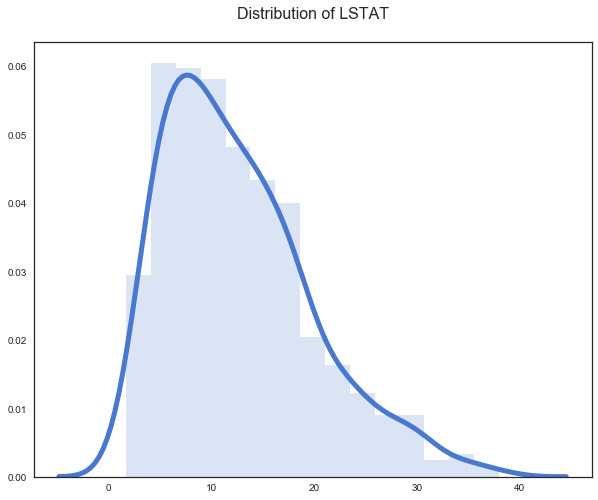

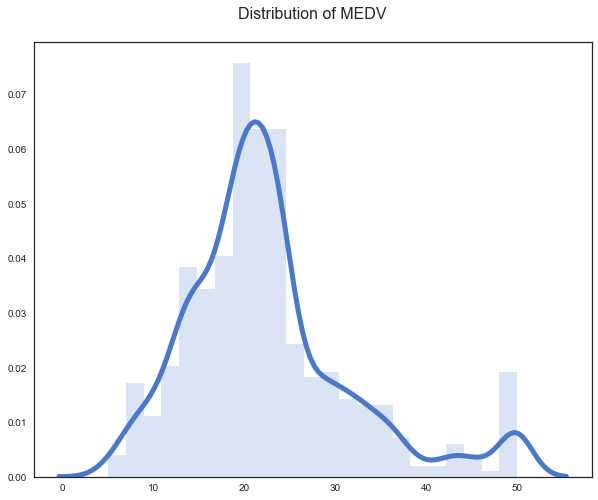

In [40]:
for i in range(len(names)):
    f, ax = plt.subplots(figsize= (10, 8))
    distribution_plotter(names[i], data_dict)
    summ_stat(names[i], data_dict)

In [64]:
from scipy.stats import kurtosis, skew

print 'Skewness'
for i in range(len(names)):
    print names[i],':', skew(data_dict[names[i]])

Skewness
CRIM : 5.20765238786
ZN : 2.21906305715
INDUS : 0.294146276844
CHAS : 3.39579929264
NOX : 0.727144159774
RM : 0.402414668025
AGE : -0.597185594802
DIS : 1.00877875652
RAD : 1.00183349245
TAX : 0.667968268724
PTRATIO : -0.799944532037
B : -2.88179834526
LSTAT : 0.903770743135
MEDV : 1.10481082286


In [24]:
meanmediandiff = {name: [] for name in names}

for i in range(len(names)):
    meanmediandiff[names[i]] = [np.mean(data_dict[names[i]]) - np.median(data_dict[names[i]])]
    if np.mean(data_dict[names[i]]) - np.median(data_dict[names[i]]) > 0:
         meanmediandiff[names[i]].append('right-skewed')
    elif np.mean(data_dict[names[i]]) - np.median(data_dict[names[i]]) < 0:
        meanmediandiff[names[i]].append('left-skewed')
        
sorted(meanmediandiff.iteritems(), key=lambda (k,v):(v,k))
#1. most symmetric 'NOX' as mean and median value closed
#2. most left-skewed 'B' as mean is much lower than median
#3. most right-skewed 'TAX' as mean is much higher than median

[('B', [-34.765968379446576, 'left-skewed']),
 ('AGE', [-8.925098814229244, 'left-skewed']),
 ('PTRATIO', [-0.5944664031620555, 'left-skewed']),
 ('NOX', [0.01669505928853754, 'right-skewed']),
 ('CHAS', [0.0691699604743083, 'right-skewed']),
 ('RM', [0.0761343873517788, 'right-skewed']),
 ('DIS', [0.5875926877470361, 'right-skewed']),
 ('LSTAT', [1.2930632411067222, 'right-skewed']),
 ('MEDV', [1.3328063241106776, 'right-skewed']),
 ('INDUS', [1.4467786561264813, 'right-skewed']),
 ('CRIM', [3.357013557312254, 'right-skewed']),
 ('RAD', [4.549407114624506, 'right-skewed']),
 ('ZN', [11.363636363636363, 'right-skewed']),
 ('TAX', [78.23715415019763, 'right-skewed'])]

### 7. Repeat question 6 but scale the variables by their range first.

As you may have noticed, the spread of the distribution contributed significantly to the results in question 6.

In [81]:
standardized_data = {name: [] for name in names}

for i in range(len(names)):
    standardized_data[names[i]] = [(value-np.mean(data_dict[names[i]]))/np.std(data_dict[names[i]]) for value in data_dict[names[i]]]

print 'Skewness'
for i in range(len(names)):
    print names[i],':', skew(standardized_data[names[i]])

Skewness
CRIM : 5.20765238786
ZN : 2.21906305715
INDUS : 0.294146276844
CHAS : 3.39579929264
NOX : 0.727144159774
RM : 0.402414668025
AGE : -0.597185594802
DIS : 1.00877875652
RAD : 1.00183349245
TAX : 0.667968268724
PTRATIO : -0.799944532037
B : -2.88179834526
LSTAT : 0.903770743135
MEDV : 1.10481082286


### 8. Univariate analysis of your choice

Conduct a full univariate analysis on MEDV, CHAS, TAX, and RAD. 

For each variable, you should answer the three questions generally asked in a univariate analysis using the most appropriate metrics.
- A measure of central tendency
- A measure of spread
- A description of the shape of the distribution (plot or metric based)

If you feel there is additional information that is relevant, include it. 

In [70]:
# A: centre(mean, median, mode); spread(var, stdev, range, IQR); shape(skewed, symmetry, kurtosis)
import scipy.stats as stats
import numpy as np
def summ_stat(col_name, data):
    print col_name
    print 'centre mean:', np.mean(data[col_name])
    print 'centre median:', np.median(data[col_name])
    print 'centre mode:', stats.mode(np.round(data[col_name]))
    print 'spread variance:', np.var(data[col_name])
    print 'spread stdev:', np.std(data[col_name])
    print 'spread range:', max(data[col_name])-min(data[col_name])
    print 'spread IQR:', np.percentile(data[col_name],75)-np.percentile(data[col_name],25)
    print 'shape skewed:', skew(data[col_name])
    print 'shape kurtosis:', kurtosis(data[col_name])

ls = ['MEDV', 'CHAS', 'TAX', 'RAD']
for l in ls:
    print summ_stat(l, data_dict)

# positive skew gives a longer right tail, negative skew gives a longer left tail
# high positive kurtosis relates to heavier tail, negative kurtosis relates to lighter tail

MEDV
centre mean: 22.532806324110677
centre median: 21.2
centre mode: ModeResult(mode=array([20.]), count=array([41]))
spread variance: 84.41955615616556
spread stdev: 9.188011545278203
spread range: 45.0
spread IQR: 7.975000000000001
shape skewed: 1.10481082286
shape kurtosis: 1.46862877227
None
CHAS
centre mean: 0.0691699604743083
centre median: 0.0
centre mode: ModeResult(mode=array([0.]), count=array([471]))
spread variance: 0.06438547704229093
spread stdev: 0.2537429349603471
spread range: 1.0
spread IQR: 0.0
shape skewed: 3.39579929264
shape kurtosis: 9.53145283591
None
TAX
centre mean: 408.2371541501976
centre median: 330.0
centre mode: ModeResult(mode=array([666.]), count=array([132]))
spread variance: 28348.62359980628
spread stdev: 168.37049503938118
spread range: 524.0
spread IQR: 387.0
shape skewed: 0.667968268724
shape kurtosis: -1.14298488484
None
RAD
centre mean: 9.549407114624506
centre median: 5.0
centre mode: ModeResult(mode=array([24.]), count=array([132]))
spread va

### 9. Have you been using inferential statistics, descriptive statistics, or both?

For each exercise, identify the branch of statistics on which you relied for your answer.

In [ ]:
# A:

### 10. Reducing the number of observations

It seems likely that this data is a census - that is, the data set includes the entire target population. Suppose that the 506 observations was too much for our computer (as unlikely as this might be) and we needed to pare this down to fewer observations. 

**10.A Use the `random.sample()` function to select 50 observations from `'AGE'`.**

([This documentation](https://docs.python.org/2/library/random.html) may be helpful.)

In [78]:
import random
random.seed(1)
sample = random.sample(data_dict['AGE'], 50)

**10.B Identify the type of sampling we just used.**

In [ ]:
# A:

### 11. [BONUS] Of the remaining types of sampling, describe (but do not execute) how you might implement at least one of these types of sampling.


In [ ]:
# A: